## Assignment III
### Thresholding algorithm by Otsu

The purpose of this assignment is to implement the thresholding algorithm invented by Otsu. There are two outputs for this program, the first of them is the thresholded image, while the second one is the value of the optimal threshold value obtained at the end of the process.

Firstly, we import the mount the google drive colab importing its related library.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Afterwards, the directory is changed to the folder in which the Test Images are stored.

In [0]:
import os
os.getcwd()
os.chdir("/content/gdrive/My Drive/BasicAlgorithmsforDigitalImaging/Lab3")

Once this is done, the next step is to import the requirements for the implementation. They are OpenCV library cv2, numpy, cv2_imshow, time and collections library.

In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import time
import matplotlib.pyplot as plt
import collections

Finally, the implementation is shown below:

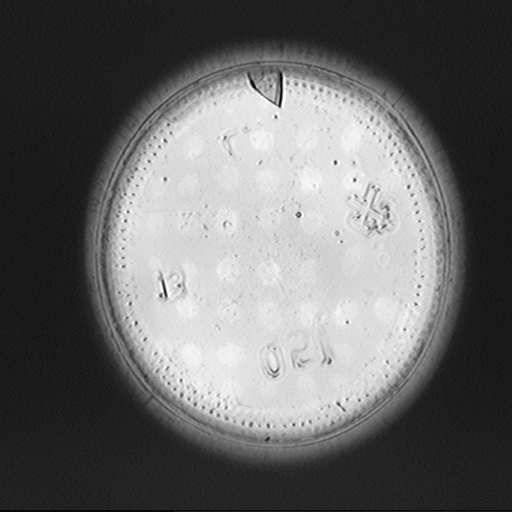

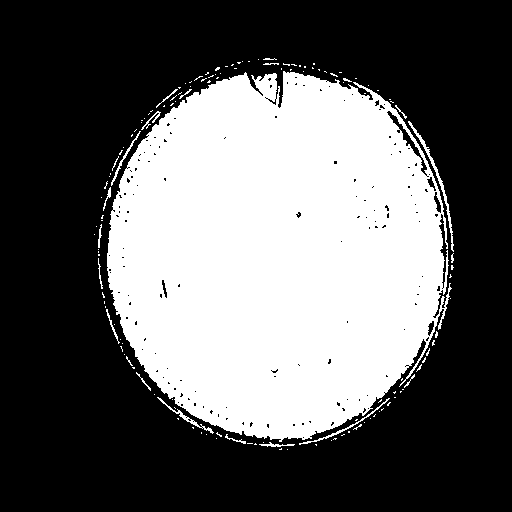

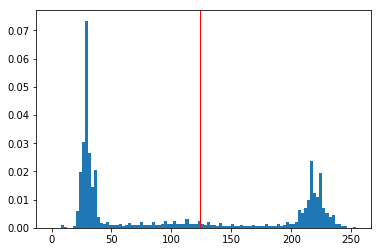

The time needed to apply thresholding using Otsu's algorithm is 0.132979154586792 seconds.


In [7]:
# Loads an image.
src = cv.imread("TestImages/all_png/bottle.png", cv.IMREAD_GRAYSCALE)
    
# Check if image is loaded correctly.
if src is None:
  print ('Error opening image!')  
  
else:
  # Show the source image.
  cv2_imshow(src)

  # Define row length and column length, as they will be widely used during the 
  # program.
  row_length = src.shape[0]
  col_length = src.shape[1]
  
  # Define the target image.
  target = np.zeros((row_length,col_length))
  
  # Define a dictionary to count the number of values of each pixel in the image.
  # Then, order such dictionary by the key.
  d = dict()
  for i in range(len(src.ravel())):
    d[src.ravel()[i]] = d.get(src.ravel()[i], 0) + ( 1 / len(src.ravel()) ) 
  od = collections.OrderedDict(sorted(d.items()))
  
  ## OTSU'S THRESHOLDING ALGORITHM
  # Start measuring the execution time for Otsu's thresholding algorithm.
  start = time.time()
  
  # Compute mean
  mean = 0
  for i in d.items():
    mean = mean + (i[0]*i[1])

  # Recursively compute q, mean1 and mean2.
  for i in enumerate(od.items()):
    if i[0] == 0:
      mean1 = [0]
      mean2 = [mean]
      q = [od[i[1][0]]]
      varb = [q[0]*(1-q[0])*((mean1[0] - mean2[0])**2)]
    
    q.append( q[i[0]] + i[1][1] )
    mean1.append( ( q[i[0]] * mean1[i[0]] + (i[1][0] + 1) * i[1][1] ) / q[i[0]+1] )
    
    if q[i[0]+1] < 1:
      mean2.append( ( mean - ( q[i[0]+1] * mean1[i[0]+1] ) ) / ( 1 - q[i[0]+1] ) )
      varb.append( q[i[0]+1] * (1 - q[i[0]+1]) * ( ( mean1[i[0]+1] - mean2[i[0]+1] ) ** 2 ) )
  
  d_pos = np.argmax(varb)
  
  # Compute the optimal t for thresholding selection.
  t_opt = 0
  for i in enumerate(od.items()):
    if d_pos == i[0]:
      t_opt = i[1][0]
  
  for i in range(src.shape[0]):
    for j in range(src.shape[1]):
      if src[i][j] > t_opt:
        target[i][j] = 255
  
  # Stop measuring the execution time for Otsu's thresholding algorithm.
  last = time.time()
  
  # Show the image after applying the Otsu's thresholding algorithm.
  cv2_imshow(target)
  
  # Show the histogram with the optimal threshold selected.
  plt.hist(src.ravel(), bins=100, density=True)
  plt.axvline(t_opt, color='red', linewidth=1)
  plt.show()
  
  # Print out the execution time of the Otsu's thresholding algorithm.
  print("The time needed to apply thresholding using Otsu's algorithm is " + str(last - start) + " seconds.")